<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 4:</span> The Big Picture</h1>
<hr>
Welcome to the **Companion Workbook** for <span style="color:royalblue">Module 4: The Big Picture</span>.


### Instructions

As you go through the online lessons, follow along here to run the lesson code for yourself. We recommend reading the lesson first, then completing its accompanying section in the workbook.

While there are no exercises in this module, we strongly recommend recreating the lesson code and playing around with it.

<br><hr id="toc">

### Table of Contents

1. [Model complexity](#complexity)
* [Toy example: noisy sine wave](#sine)
* [Mean model](#mean)
* [Linear regression](#linear)
* [Polynomial linear regression](#polynomial)
* [Decision trees](#tree)

**Tip:** Each section builds on the previous ones.

<br><hr>

<br>
### First, let's import the libraries we'll need.

Before we do anything else, let's import the <code style="color:steelblue">print()</code> function from the future to ensure our code is compatible with Python 3.

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import Pandas and NumPy.

In [2]:
import numpy as np
import pandas as pd

Finally, let's import our **data visualization** libraries.
* <code style="color:steelblue">matplotlib</code> is a flexible and powerful tool for visualizing data.
    * From it, we import the <code style="color:steelblue">pyplot</code> submodule and give it the alias <code style="color:steelblue">plt</code>.
* <code style="color:steelblue">%matplotlib inline</code> tells Jupyter Notebook to plot the charts inside this notebook directly.
* <code style="color:steelblue">seaborn</code> provides convenient wrappers on top of matplotlib. It also provides nice styles and themes for our charts.
    * We give it the alias <code style="color:steelblue">sns</code>

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

This is the first time we'll use these libraries, so this module will also be a gentle introduction to plotting.

<br id="complexity">
# 1. Model complexity

No code to run. 

<br id="sine">
# 2. - Toy example: noisy sine wave

For the rest of this module, we're going to switch over to a toy example.
* Remember, the relevant code is all included in the online lesson.

First, create the dataset for the noisy sine wave:

In [11]:
# input feature
x = np.linspace(0, 2*np.pi, 100)

# noise
np.random.seed(321)
noise = np.random.normal(0, 0.5, 100)

# target variable
y = np.sin(x) + noise

For convenience, let's throw $x$ and $y$ into a Pandas DataFrame.

In [13]:
# Create DataFrame with x and y
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


Before moving on, let's plot that dataset first. 

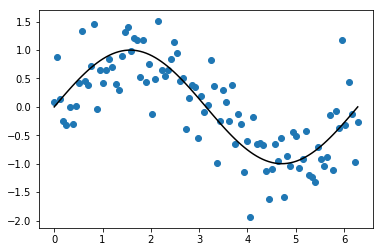

In [16]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay the sine wave
plt.plot(df.x, np.sin(df.x), color='k')

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="mean">
# 3 -  Mean model

Now it's time to start building some models. Let's start with a **very simple** model. 

Build the mean model with 1 line of code.

In [18]:
# Build model
pred = np.mean(df.y)

Print the prediction, for any value of x.

In [19]:
# Display predictions for any value of x
print(pred)

-0.0172549172973


Let's see how that model "fits" the training data.
* First, we will use <code style="color:steelblue">plt.scatter()</code> again to plot the dataset.
* Then, we will use <code style="color:steelblue">plt.plot()</code> again, but this time print the predictions from our <span style="color:royalblue;">mean model</span> as a dotted black line.

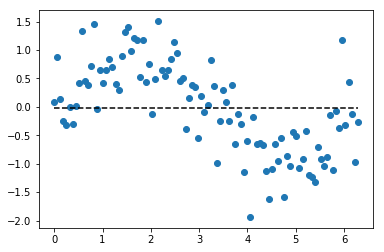

In [25]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay horizontal line for the prediction
plt.plot(df.x, [pred]*len(df.x), 'k--')

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="linear">
# 4. Linear regression

Next, let's introduce linear regression. 

First, let's import <code style="color:steelblue">LinearRegression</code> from Scikit-Learn. 
* Scikit-Learn comes with implementations of many popular model types.
* We'll explore many of them throughout the course.

In [26]:
# Import LinearRegression from Scikit-Learn
from sklearn.linear_model import LinearRegression

Next, let's build a linear model for our example dataset.

In [28]:
# Initialize instance of linear regression
lm = LinearRegression()

# Separate our input features and target variable
features = df.drop('y', axis=1)
target = df.y

# Fit model to the data
lm.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's display the intercept ($\beta_0$) and coefficient ($\beta_1$) that were estimated from the dataset. 

In [29]:
# Print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

0.823867512027
[-0.26773758]


Finally, let's plot that line.
* Note that we are passing in the predicted values of $y$, or <code style="color:steelblue">lm.predict(features)</code>, as the second argument into <code style="color:steelblue">plt.plot()</code>.

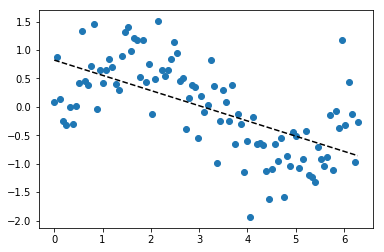

In [30]:
# Plot original points
plt.scatter(df.x, df.y)

# Plot predicted values of y
plt.plot(df.x, lm.predict(features), 'k--')


<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="polynomial">
# 5 - Polynomial linear regression

Next, we'll take a look at polynomial linear regression.

Let's quickly write a couple helper functions that will make building these models easier.

First, we'll write a <code style="color:steelblue">fit_and_plot_fitted_model()</code> function that performs exactly what we did for the <span style="color:royalblue">linear regression</span> earlier, except for any model and any set of features.
* Splits input features from target variable
* Fits the model
* Plots the dataset
* Overlays the predicted values for $y$

In [50]:
# fit_and_plot_model function
def fit_and_plot_model(df, model):
    features = df.drop('y', axis=1)
    target = df.y
    model.fit(features, target)
    plt.scatter(df.x, df.y)
    plt.plot(df.x, model.predict(features), 'k--')

Then, we'll write a <code style="color:steelblue">fit_polynomial_model()</code> function that creates powers of $x$ up to a maximum polynomial (a.k.a. the "order" of the model).
* If the "order" is 1, then we'll just fit and plot the model directly.
* If the "order" is greater than 1, then we'll create the polynomial terms: $x^2$, $x^3$, etc.

In [65]:
# fit_and_plot_polynomial_model function
def fit_and_plot_polynomial_model(df, model, max_polynomial=1):
    df_copy = df.copy()
    if max_polynomial == 1:
        fit_and_plot_model(df_copy, model)
    else:
        for power in range(2, max_polynomial + 1):
            df_copy['x{}'.format(power)] = np.power(x, power)
        fit_and_plot_model(df_copy, model)

Now, let's fit and plot the <span style="color:royalblue">second-order polynomial linear regression using our helper functions:

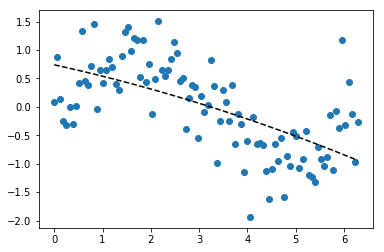

In [67]:
# Fit and plot 2nd-order polynomial linear regression
fit_and_plot_polynomial_model(df, LinearRegression(), 2)

Let's fit and plot a <span style="color:royalblue">third-order polynomial linear regression</span>:

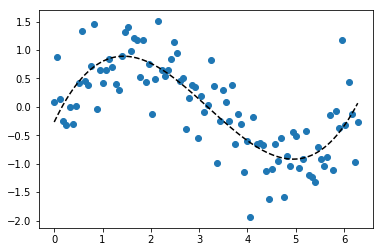

In [68]:
# Fit and plot 3rd-order polynomial linear regression
fit_and_plot_polynomial_model(df, LinearRegression(), 3)

Now, just to illustrate a point, let's fit and plot a <span style="color:royalblue">10th-order polynomial linear regression</span>:

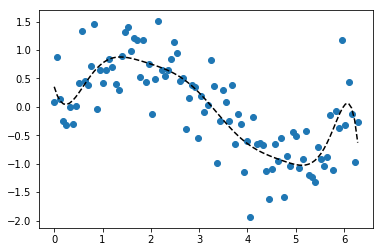

In [69]:
# Fit and plot 10th-order polynomial linear regression
fit_and_plot_polynomial_model(df, LinearRegression(), 10)

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="tree">
# 6. Decision trees

Just for fun, let's see what happens when you crank model complexity way up.

First, let's import <code style="color:steelblue">DecisionTreeRegressor</code> from Scikit-Learn.

In [71]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

Next, we can use our helper function, <code style="color:steelblue">fit_and_plot_model()</code>, to fit and plot an **unconstrained** decision tree:

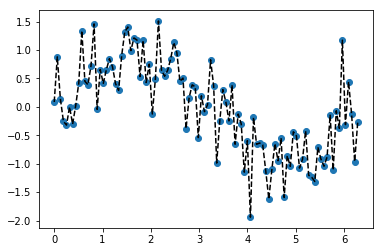

In [73]:
# fit and plot unconstrained decision tree
fit_and_plot_model(df, DecisionTreeRegressor()) 

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br>
## Next Steps

First, a huge congrats on finishing the first project!


Here are a few of things you did in this final module:
* You learned about one of the most important concepts in machine learning: model complexity.
* You generated an artificial dataset from a noisy sine wave.
* You fit and plotted mean, linear regression, polynomial linear, and decision tree models.
* And you compared their results against the "true underlying relationship" in the artificial dataset.

In the next project, <span style="color:royalblue">Project 2: Real-Estate Tycoon</span>, we will dive deeper into these concepts, plus many others. You will get to practice the entire **machine learning workflow** from end to end!

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>